In [47]:
import pandas as pd 
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer , TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kavana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
df = pd.read_csv("data\drugsComTrain_raw.tsv" , sep='\t')
df.head()


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\kavana\AppData\Local\Temp\ipykernel_31248\3282246665.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("data\drugsComTrain_raw.tsv" , sep='\t')


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [49]:
df.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [50]:
df.condition.value_counts()


condition
Birth Control                                  28788
Depression                                      9069
Pain                                            6145
Anxiety                                         5904
Acne                                            5588
                                               ...  
Tinea Barbae                                       1
Acute Nonlymphocytic Leukemia                      1
62</span> users found this comment helpful.        1
92</span> users found this comment helpful.        1
Neutropenia                                        1
Name: count, Length: 884, dtype: int64

In [51]:
df.condition.nunique()


884

In [52]:
df.shape

(161297, 7)

In [53]:
condition_counts = df['condition'].value_counts()
condition_valid = condition_counts[condition_counts>=1000].index
df_filtered = df[df['condition'].isin(condition_valid)]

In [54]:
print(df_filtered)

        Unnamed: 0                  drugName                condition  \
1            95260                Guanfacine                     ADHD   
2            92703                    Lybrel            Birth Control   
3           138000                Ortho Evra            Birth Control   
4            35696  Buprenorphine / naloxone        Opiate Dependence   
6           165907            Levonorgestrel  Emergency Contraception   
...            ...                       ...                      ...   
161284      121154               Venlafaxine            Panic Disorde   
161286       93069              Vortioxetine               Depression   
161287      132177                    Ativan                  Anxiety   
161290      103458                  Tekturna      High Blood Pressure   
161291      164345            Junel 1.5 / 30            Birth Control   

                                                   review  rating  \
1       "My son is halfway through his fourth week of 

In [55]:
X = df_filtered.drop(['Unnamed: 0' , 'drugName','rating','date','usefulCount'],axis=1)

In [56]:
X.head()

,condition,review
1,ADHD,"""My son is halfway through his fourth week of ..."
2,Birth Control,"""I used to take another oral contraceptive, wh..."
3,Birth Control,"""This is my first time using any form of birth..."
4,Opiate Dependence,"""Suboxone has completely turned my life around..."
6,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t..."


# WordCloud

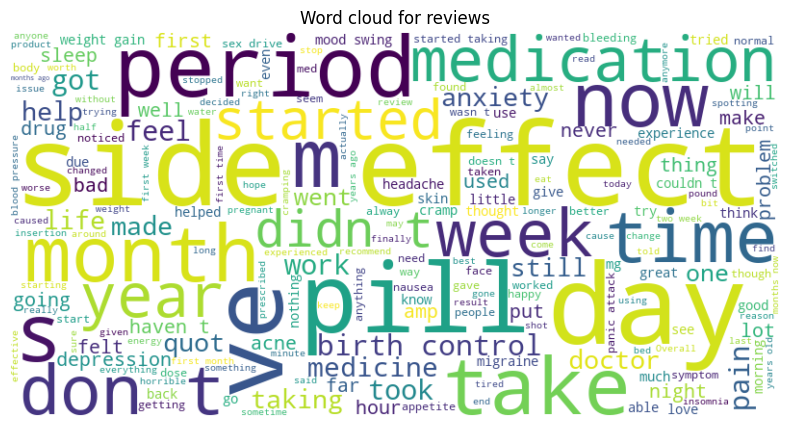

In [57]:
text = " ".join(df_filtered['review'])
wordcloud = WordCloud(width =800 , height=400, background_color ='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud for reviews')
plt.show()

Wordcloud for condition

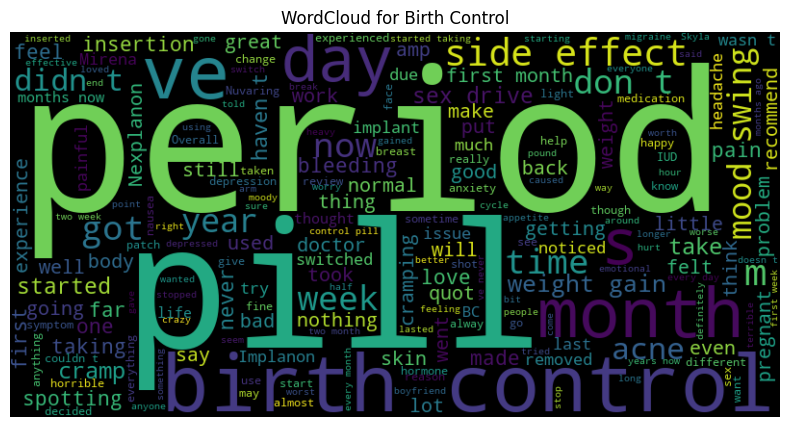

In [58]:
X_birth=X[X["condition"]=='Birth Control']
wordcloud = WordCloud(width =800 , height=400, background_color ='black').generate(" ".join(X_birth.review))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud for Birth Control")
plt.show()

# preprocess data(lemmatize , stopwords)

In [59]:
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = BeautifulSoup(text , 'html.parser').get_text()
    text=text.lower()
    text = re.sub(r'[^a-zA-Z\s]',"",text)
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    words =[word for word in words if word not in stop_words]
    lemmatize_word = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(lemmatize_word)

X["processed_review"]= X["review"].apply(preprocess_text)

X.head()

C:\Users\kavana\AppData\Local\Temp\ipykernel_31248\711432911.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text , 'html.parser').get_text()


,condition,review,processed_review
1,ADHD,"""My son is halfway through his fourth week of ...",son halfway fourth week intuniv became concern...
2,Birth Control,"""I used to take another oral contraceptive, wh...",used take another oral contraceptive pill cycl...
3,Birth Control,"""This is my first time using any form of birth...",first time using form birth control im glad we...
4,Opiate Dependence,"""Suboxone has completely turned my life around...",suboxone completely turned life around feel he...
6,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",pulled cummed bit took plan b hour later took ...


In [60]:
y = X["condition"]
y.head

<bound method NDFrame.head of 1                            ADHD
2                   Birth Control
3                   Birth Control
4               Opiate Dependence
6         Emergency Contraception
                   ...           
161284              Panic Disorde
161286                 Depression
161287                    Anxiety
161290        High Blood Pressure
161291              Birth Control
Name: condition, Length: 110121, dtype: object>

# Creating train and test data

In [61]:
X = X["processed_review"]
X_train , X_test , y_train ,y_test = train_test_split(X ,y , test_size=0.2 , random_state=42)


# Bag of words

# Count vectorizer

In [62]:
# Count vectorizer

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

Naive Bayes

In [63]:
mnb = MultinomialNB()
mnb.fit(count_train , y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy : %0.3f" %score)

accuracy : 0.744


Passive Aggresive Classifier

In [64]:

pac = PassiveAggressiveClassifier()
pac.fit(count_train , y_train)
pred = pac.predict(count_test)
score = metrics.accuracy_score(y_test , pred)
print("accuracy : %0.3f" %score)

accuracy : 0.798


# TF-IDF

In [65]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english" , max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 
tfidf_test = tfidf_vectorizer.transform(X_test)


Naive bayes

In [66]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train , y_train)
pred_tfidf = mnb_tf.predict(tfidf_test)
score_tf = metrics.accuracy_score(y_test , pred_tfidf)
print("accuracy : %0.3f" %score_tf)

accuracy : 0.482


PassiveAggressive classifier

In [67]:
pac_tf = PassiveAggressiveClassifier()
pac_tf.fit(tfidf_train , y_train)
pred_tf = pac_tf.predict(tfidf_test)
score_tfidf = metrics.accuracy_score(y_test , pred_tf)
print("accuracy : %0.3f" %score_tfidf)

accuracy : 0.828


TFidf-Bigrams

In [68]:
tfidf_vectorizer_bigram = TfidfVectorizer(stop_words="english" , max_df=0.8 , ngram_range=(1,2))
tfidf_train_bigram = tfidf_vectorizer_bigram.fit_transform(X_train) 
tfidf_test_bigram = tfidf_vectorizer_bigram.transform(X_test)


In [69]:
mnb_tf_bi = MultinomialNB()
mnb_tf_bi.fit(tfidf_train_bigram , y_train)
pred_tfidf_bi = mnb_tf_bi.predict(tfidf_test_bigram)
score_tf_bi = metrics.accuracy_score(y_test , pred_tfidf_bi)
print("accuracy : %0.3f" %score_tf_bi)

accuracy : 0.339


In [70]:
pac_tf_bi = PassiveAggressiveClassifier()
pac_tf_bi.fit(tfidf_train_bigram , y_train)
pred_tf_bi = pac_tf_bi.predict(tfidf_test_bigram)
score_tfidf_bi = metrics.accuracy_score(y_test , pred_tf_bi)
print("accuracy : %0.3f" %score_tfidf_bi)

accuracy : 0.872


In [71]:
tfidf_vectorizer_bigram = TfidfVectorizer(stop_words="english" , max_df=0.8 , ngram_range=(1,3))
tfidf_train_bigram = tfidf_vectorizer_bigram.fit_transform(X_train) 
tfidf_test_bigram = tfidf_vectorizer_bigram.transform(X_test)


mnb_tf_bi = MultinomialNB()
mnb_tf_bi.fit(tfidf_train_bigram , y_train)
pred_tfidf_bi = mnb_tf_bi.predict(tfidf_test_bigram)
score_tf_bi = metrics.accuracy_score(y_test , pred_tfidf_bi)
print("accuracy : %0.3f" %score_tf_bi)


accuracy : 0.316


In [72]:
tfidf_vectorizer_trigram = TfidfVectorizer(stop_words="english" , max_df=0.8 , ngram_range=(1,3))
tfidf_train_trigram = tfidf_vectorizer_trigram.fit_transform(X_train) 
tfidf_test_trigram = tfidf_vectorizer_trigram.transform(X_test)

pac_tf_tri = PassiveAggressiveClassifier()
pac_tf_tri.fit(tfidf_train_trigram , y_train)
pred_tf_tri = pac_tf_tri.predict(tfidf_test_trigram)
score_tfidf_tri = metrics.accuracy_score(y_test , pred_tf_tri)
print("accuracy : %0.3f" %score_tfidf_tri)

accuracy : 0.876


# Sample prediction

In [73]:
text =["I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it &"]
test = tfidf_vectorizer_trigram.transform(text)
pred1 = pac_tf_tri.predict(test)[0]
pred1

np.str_('Birth Control')

In [74]:
text =["""Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."""]
test = tfidf_vectorizer_trigram.transform(text)
pred1 = pac_tf_tri.predict(test)[0]
pred1

np.str_('Opiate Dependence')

In [75]:
text =["""Just started taking temazepam. Sleeping a lot better, only waking for toilet break - have to be careful getting up as quite groggy, back to sleep easy after getting back to bed."""	]
test = tfidf_vectorizer_trigram.transform(text)
pred1 = pac_tf_tri.predict(test)[0]
pred1

np.str_('Insomnia')

In [76]:
def top_drugs_extract(condition):
    df_top = df_filtered[(df["rating"]>=9)&(df["usefulCount"]>=100)].sort_values(by=["rating" , "usefulCount"],ascending=False)
    drug_list =df_top[df_top["condition"]==condition]["drugName"].head(3).tolist()
    return drug_list

In [77]:
def predict_text(list_text):
    df_test =pd.DataFrame(list_text , columns=["test_sent"])
    df_test["test_sent"] = df_test["test_sent"].apply(preprocess_text)
    tfidf_trigram = tfidf_vectorizer_trigram.transform(list_text)
    prediction = pac_tf_tri.predict(tfidf_trigram)
    df_test["prediction"]=prediction
    return df_test

In [95]:
sentences=["I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1."]

In [96]:
tfidf_trigram = tfidf_vectorizer_trigram.transform(sentences)

predictions = pac_tf_tri.predict(tfidf_trigram)
results = []

for text, label in zip(sentences,predictions):
    target = predictions[0]
    top_drugs = top_drugs_extract(label)
    result ={
        "top_drugs":[top_drugs[0], top_drugs[1],top_drugs[2]]
    }
    print("condition:" , target)
    print(top_drugs[0],"\n", top_drugs[1],"\n",top_drugs[2])
    results.append(result)

C:\Users\kavana\AppData\Local\Temp\ipykernel_31248\10727703.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_top = df_filtered[(df["rating"]>=9)&(df["usefulCount"]>=100)].sort_values(by=["rating" , "usefulCount"],ascending=False)


condition: Anxiety
Alprazolam 
 Xanax 
 Buspirone


In [94]:
results

[{'top_drugs': ['Sertraline', 'Zoloft', 'Viibryd']}]

In [84]:
import joblib
joblib.dump(tfidf_vectorizer_trigram , "tfidf.pkl")
joblib.dump( pac_tf_tri, "model.pkl")
joblib.dump(results , "results.pkl")

['results.pkl']

In [97]:
df_filtered = pd.DataFrame(df_filtered)
df_filtered.to_csv("df_filtered.csv" , index=False)